## Data Science and Business Analytics Intern(July-21).

## Task-1: Prediction using Supervised Machine Learning

# Name : Sushant Patil

### Problem Statement: 
### 1.Predict the percentage of a student based on the no. of study hours.
### 2. What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

### Importing & Loading the Train Dataset

In [75]:
df = pd.read_csv("http://bit.ly/w-data")
print("Data Imported Successfully")

Data Imported Successfully


In [76]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [77]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Dataset Shape:


In [78]:
df.shape

(25, 2)

### Dataset Info:

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [80]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking the Missing Values

In [81]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data Visualization

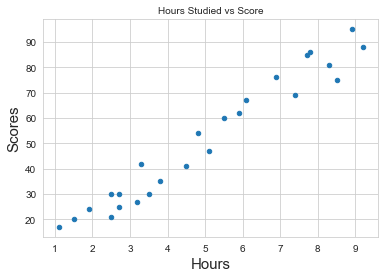

In [82]:
##imploting Scatter plot
df.plot(kind='scatter', x='Hours', y='Scores')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours Studied vs Score', fontsize=10)
plt.show()

#### This "Scatter Plot" indicates positive linear relationship as much as hours You study is a chance of high scoring.

In [83]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Distribution

In [84]:
hours=df['Hours']
scores=df['Scores']

<AxesSubplot:xlabel='Scores', ylabel='Density'>

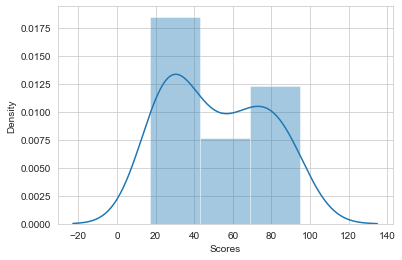

In [85]:
sns.distplot(scores)

<AxesSubplot:xlabel='Hours', ylabel='Density'>

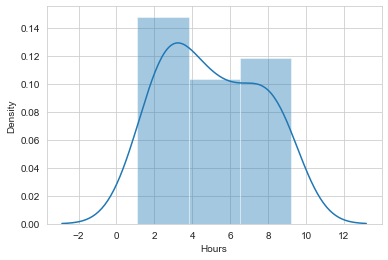

In [86]:
sns.distplot(hours)

### Preparing Data

In [87]:
#Now lets divide our data to independent and dependent variable.
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values

### Spliting Data into Train and Test Sets.

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, random_state = 0, test_size=0.2)

In [89]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)


X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


### Training the Model Using Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression


##creating an object of Linear Regression
linreg=LinearRegression()

In [91]:
##Fitting Training Data
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished.")

Training our algorithm is finished.


In [92]:
print("Coefficient = ",linreg.coef_)
print("Intercept = ",linreg.intercept_)

Coefficient =  [9.91065648]
Intercept =  2.0181600414346974


In [93]:
##plotting the Regression Line  
m=linreg.coef_
c=linreg.intercept_
line=m*X+c

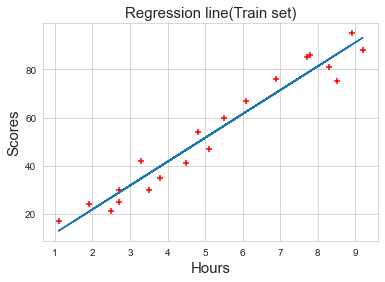

In [94]:
##plotting on train data
plt.scatter(X_train,Y_train,color='red',marker='+')
plt.title("Regression line(Train set)",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.plot(X, line);
plt.show()

### Test Data

#### Making Prediction

In [95]:
print(X_test)
Y_pred=linreg.predict(X_test)  

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [96]:
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [97]:
print(Y_test)

[20 27 69 30 62]


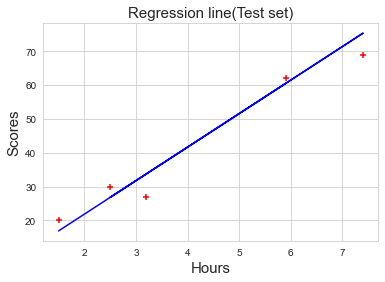

In [67]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='blue')
plt.scatter(X_test,Y_test,color='red',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=15)
plt.show()

### Comparision Between Actual vs Predicted Scores.¶

In [98]:
df_compare = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df_compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


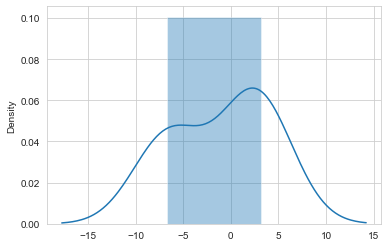

In [99]:
sns.set_style('whitegrid')
sns.distplot(np.array(Y_test-Y_pred))
plt.show()

### Accuracy of the Model

In [70]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)         ##Goodness of fit Test

0.9454906892105355

### Above 94% percentage indicates that above fitted Model is a GOOD MODEL. 

### Predicting the Score¶

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [100]:
hours = [9.25]
pred = linreg.predict([hours])
print("Number of Hours = {}".format(hours))
print("Predicted Score for a student studying 9.25 hours per day : {} % .".format(pred[0]))

Number of Hours = [9.25]
Predicted Score for a student studying 9.25 hours per day : 93.69173248737535 % .


## Predicting the Error

In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [101]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217406
Root Mean Squared Error =  4.647447612100367
Mean Absolute Error     =  4.647447612100367


## Conclusion:

### From the above result we can say that if a studied for 9.25 hours, then student will score 93.69 %.